In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flow_decomposition import FlowDecomposition
from flow_regression import DecomposedFlowRegression
#from sklearn.utils import shuffle

from FastCCM import PairwiseCCM
import os
import glob

import pandas as pd
import re


In [2]:

precomputed_dir = '/Users/iaroslav/Data/data_precomputed_compressed/'
file_paths = glob.glob(os.path.join(precomputed_dir, '*.npz'))

# Create a DataFrame.
df = pd.DataFrame(file_paths, columns=['file_path'])

# Function to extract the bird name (alphabetical part plus number) before the dash.
def extract_bird_name(path):
    file_name = path.split('/')[-1]
    # Split by '-' and take the first part.
    return file_name.split('-')[0]

# Create a new column 'bird' with the extracted name.
df['bird'] = df['file_path'].apply(extract_bird_name)

# Group by the 'bird' column and aggregate file paths into a list.
grouped = df.groupby('bird')['file_path'].apply(list).reset_index()
grouped.set_index('bird', inplace=True)

In [3]:
X = []
for file_path in grouped.loc["blue621"].to_numpy()[0]:  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)
    


In [4]:
X = []
for file_path in np.concatenate(np.concatenate(grouped.loc[grouped.index[700:740]].to_numpy())):  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)
    


KeyboardInterrupt: 

In [35]:
files_sel = shuffle(
                np.concatenate(
                    np.concatenate(
                        grouped.loc[shuffle(grouped.index)[0:100]].to_numpy()
                        )
                    )
                )[:200]
X = []
for file_path in files_sel:  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)

In [4]:
X_train = X
Y_train = X.mean(axis=1)[:,None]

In [5]:
Y_train.shape

(254078, 1)

In [5]:
init_params = {
    "input_dim": X.shape[1], 
    "proj_dim": 2,
    "n_components": 5,    
    "num_delays": 1,
    "delay_step": 1,
    "model": "linear",
    "subtract_autocorr": False,
    "device": "cpu",
    "data_device": "cpu",
    "optimizer": "Adagrad",
    "learning_rate": 0.01,
    "random_state": None
}

# Fit parameters.
fit_params = {
    "sample_size": 200,
    "library_size": 1000,
    "exclusion_rad": 30,
    "time_intv": 64,
    "num_epochs": 1000,
    "num_rand_samples": 64,
    "batch_size": 64,
    "method": "knn",
    "nbrs_num": 24,
    "theta": 5,
    "beta": 0,
    "optim_policy": "range"
}

fd = DecomposedFlowRegression(**init_params)
fd.fit(X_train, Y_train, **fit_params)

Epoch 1/1000, CCM Loss: 1.3871, h_norm: 0.8702, Total Loss: 0.3272
Epoch 2/1000, CCM Loss: 1.4124, h_norm: 0.8554, Total Loss: 0.3453
Epoch 3/1000, CCM Loss: 1.3193, h_norm: 0.8536, Total Loss: 0.2771
Epoch 4/1000, CCM Loss: 1.2332, h_norm: 0.8531, Total Loss: 0.2096
Epoch 5/1000, CCM Loss: 1.1965, h_norm: 0.8511, Total Loss: 0.1794
Epoch 6/1000, CCM Loss: 1.0199, h_norm: 0.8501, Total Loss: 0.0197
Epoch 7/1000, CCM Loss: 0.8090, h_norm: 0.8480, Total Loss: -0.2120
Epoch 8/1000, CCM Loss: 0.6963, h_norm: 0.8466, Total Loss: -0.3619
Epoch 9/1000, CCM Loss: 0.6039, h_norm: 0.8442, Total Loss: -0.5043
Epoch 10/1000, CCM Loss: 0.6023, h_norm: 0.8444, Total Loss: -0.5070
Epoch 11/1000, CCM Loss: 0.5186, h_norm: 0.8418, Total Loss: -0.6567
Epoch 12/1000, CCM Loss: 0.5594, h_norm: 0.8405, Total Loss: -0.5808
Epoch 13/1000, CCM Loss: 0.5243, h_norm: 0.8399, Total Loss: -0.6457
Epoch 14/1000, CCM Loss: 0.4983, h_norm: 0.8385, Total Loss: -0.6966
Epoch 15/1000, CCM Loss: 0.4784, h_norm: 0.8365, 

KeyboardInterrupt: 

In [5]:
init_params = {
    "input_dim": 257, 
    "proj_dim": 3,
    "n_components": 5,    
    "num_delays": 3,
    "delay_step": 32,
    "model": "linear",
    "subtract_autocorr": True,
    "device": "cuda",
    "data_device": "cuda",
    "optimizer": "Adagrad",
    "learning_rate": 0.001,
    "random_state": None
}

fit_params = {
    "sample_size": 300,
    "library_size": 1500,
    "exclusion_rad": 30,
    "time_intv": 64,
    "num_epochs": 200,
    "num_rand_samples": 64,
    "batch_size": 64,
    "method": "knn",
    "nbrs_num": 24,
    "theta": 5,
    "beta": 0,
    "optim_policy": "range",
    "mask_size": None
}

fd = FlowDecomposition(**init_params)
reshuffling_rounds = 100

for e in range(reshuffling_rounds):
    print("Round:", e)
    files_sel = shuffle(
                np.concatenate(
                    np.concatenate(
                        grouped.loc[shuffle(grouped.index)[0:100]].to_numpy()
                        )
                    )
                )[:200]
    X = []
    for file_path in files_sel:  
        data = np.load(file_path)
        X.append(data['spectrogram'])
    X = np.concatenate(X)

    fd.fit(X, **fit_params)

Round: 0
Epoch 1/200, Loss: 1.1261, ccm_loss: 1.1261, h_norm_loss: 0.8648
Epoch 2/200, Loss: 1.0328, ccm_loss: 1.0328, h_norm_loss: 0.8647
Epoch 3/200, Loss: 0.9904, ccm_loss: 0.9904, h_norm_loss: 0.8642
Epoch 4/200, Loss: 0.9707, ccm_loss: 0.9707, h_norm_loss: 0.8640
Epoch 5/200, Loss: 0.9624, ccm_loss: 0.9624, h_norm_loss: 0.8639
Epoch 6/200, Loss: 0.9571, ccm_loss: 0.9571, h_norm_loss: 0.8638
Epoch 7/200, Loss: 0.9561, ccm_loss: 0.9561, h_norm_loss: 0.8638
Epoch 8/200, Loss: 0.9558, ccm_loss: 0.9558, h_norm_loss: 0.8638
Epoch 9/200, Loss: 0.9549, ccm_loss: 0.9549, h_norm_loss: 0.8639
Epoch 10/200, Loss: 0.9530, ccm_loss: 0.9530, h_norm_loss: 0.8639
Epoch 11/200, Loss: 0.9505, ccm_loss: 0.9505, h_norm_loss: 0.8639
Epoch 12/200, Loss: 0.9514, ccm_loss: 0.9514, h_norm_loss: 0.8640
Epoch 13/200, Loss: 0.9521, ccm_loss: 0.9521, h_norm_loss: 0.8640
Epoch 14/200, Loss: 0.9522, ccm_loss: 0.9522, h_norm_loss: 0.8640
Epoch 15/200, Loss: 0.9488, ccm_loss: 0.9488, h_norm_loss: 0.8640
Epoch 16/2

KeyboardInterrupt: 

In [6]:
unmixed = fd.transform(X)

In [11]:
import torch
fd.component_mixing(torch.ones(5))
[i for i in fd.component_mixing.parameters()]

[Parameter containing:
 tensor([[ 0.3234,  0.1309,  0.1269, -0.0892, -0.0107]], requires_grad=True)]

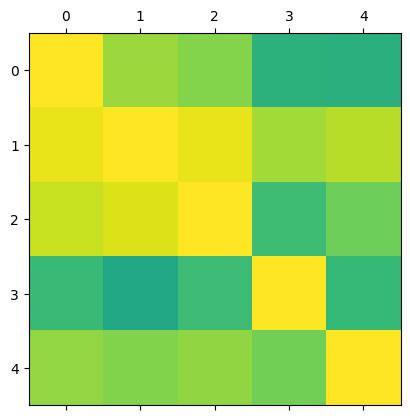

In [12]:
plt.matshow(PairwiseCCM("cpu").compute(unmixed.transpose(1,0,2),unmixed.transpose(1,0,2),3000,400).mean(axis=0),vmax=1,vmin=0)

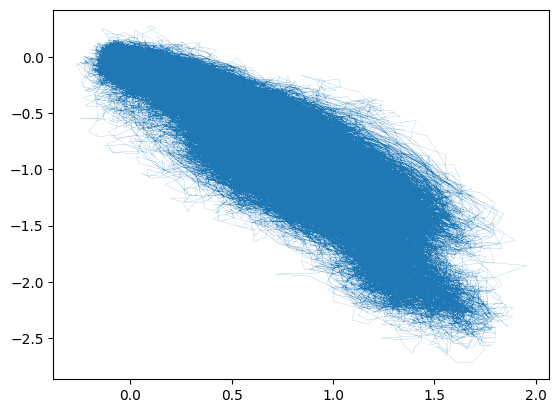

In [12]:
plt.plot(unmixed[:,0,0],unmixed[:,1,0],lw=0.1)

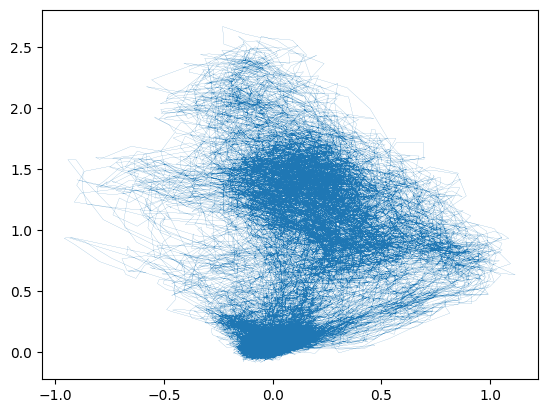

In [10]:
plt.plot(unmixed[:50000,1,1],unmixed[:50000,1,0],lw=0.1)

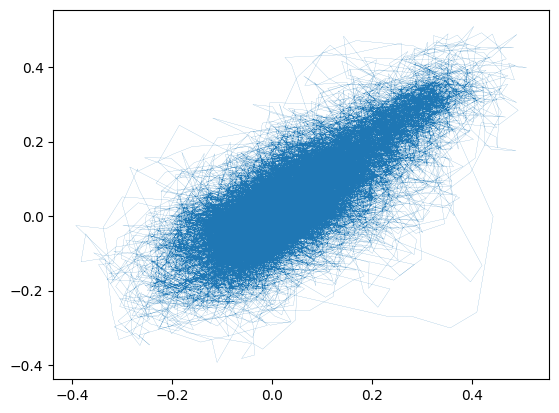

In [8]:
plt.plot(unmixed[5:50000,1,0],unmixed[:49995,1,0],lw=0.1)

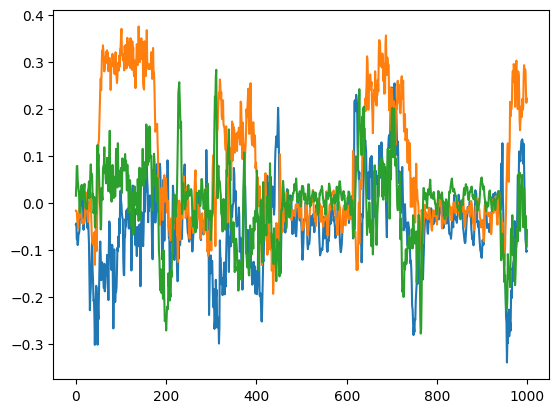

In [9]:
plt.plot(unmixed[2000:3000,0,0])
plt.plot(unmixed[2000:3000,1,0])
plt.plot(unmixed[2000:3000,2,0])

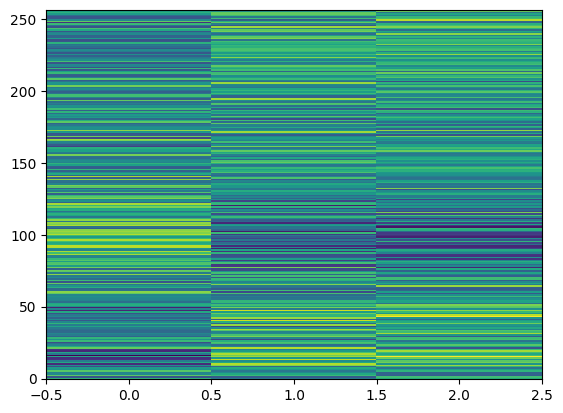

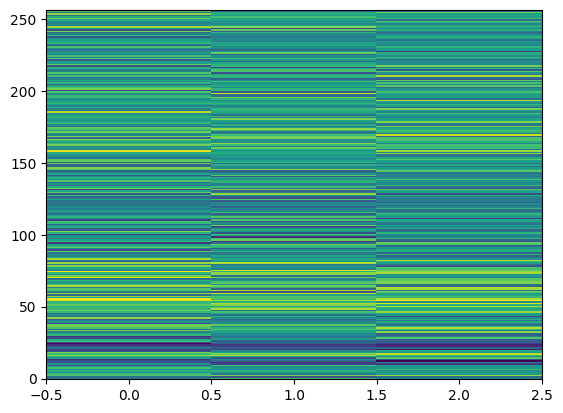

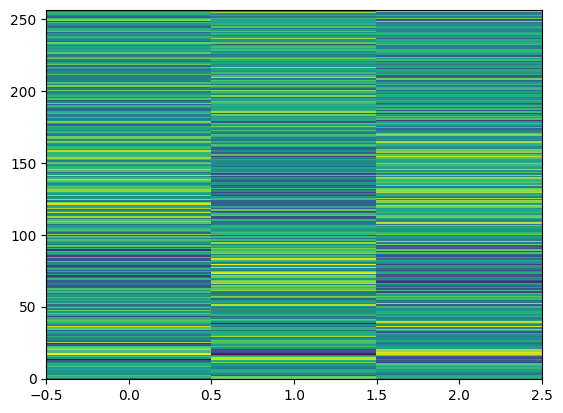

In [10]:
plt.imshow(fd.model.get_weights()[:,0],interpolation="nearest",aspect="auto",origin="lower")
plt.show()
plt.imshow(fd.model.get_weights()[:,1],interpolation="nearest",aspect="auto",origin="lower")
plt.show()
plt.imshow(fd.model.get_weights()[:,2],interpolation="nearest",aspect="auto",origin="lower")

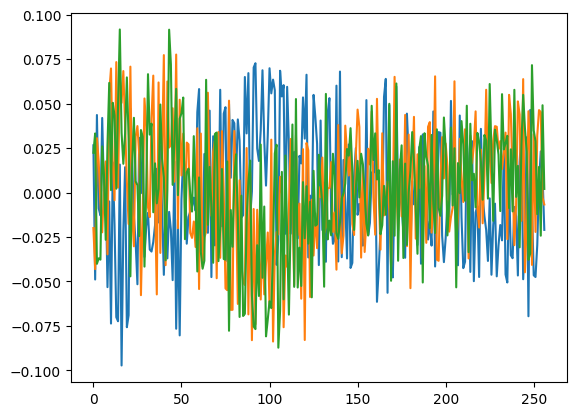

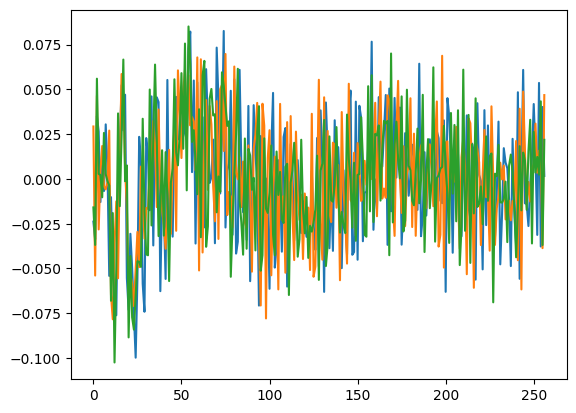

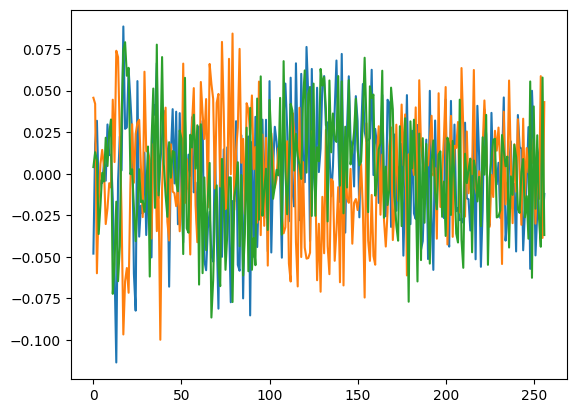

In [11]:
plt.plot((fd.model.get_weights()[:,0]))
plt.show()
plt.plot((fd.model.get_weights()[:,1]))
plt.show()
plt.plot((fd.model.get_weights()[:,2]))